In [9]:
import pandas as pd
import pandas_datareader.data as data
import matplotlib.pyplot as plt
import numpy as np

In [10]:
start = '2010-01-01'
end = '2022-12-31'

In [11]:
df = data.DataReader('XOM','stooq', start, end)
df = df.sort_values(by='Date')
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,42.7679,43.1054,42.4364,43.0324,4.468467e+07
2010-01-05,43.0588,43.2202,42.8185,43.2036,4.848468e+07
2010-01-06,43.2202,43.9369,43.1560,43.5761,5.631080e+07
2010-01-07,43.5012,43.6033,43.2036,43.4389,4.365848e+07
2010-01-08,43.3718,43.4069,43.0772,43.2639,3.999167e+07


In [12]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Volume
0,2010-01-04,42.7679,43.1054,42.4364,43.0324,4.468467e+07
1,2010-01-05,43.0588,43.2202,42.8185,43.2036,4.848468e+07
2,2010-01-06,43.2202,43.9369,43.1560,43.5761,5.631080e+07
3,2010-01-07,43.5012,43.6033,43.2036,43.4389,4.365848e+07
4,2010-01-08,43.3718,43.4069,43.0772,43.2639,3.999167e+07


In [13]:
df = df.drop(['Date'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,42.7679,43.1054,42.4364,43.0324,4.468467e+07
1,43.0588,43.2202,42.8185,43.2036,4.848468e+07
2,43.2202,43.9369,43.1560,43.5761,5.631080e+07
3,43.5012,43.6033,43.2036,43.4389,4.365848e+07
4,43.3718,43.4069,43.0772,43.2639,3.999167e+07


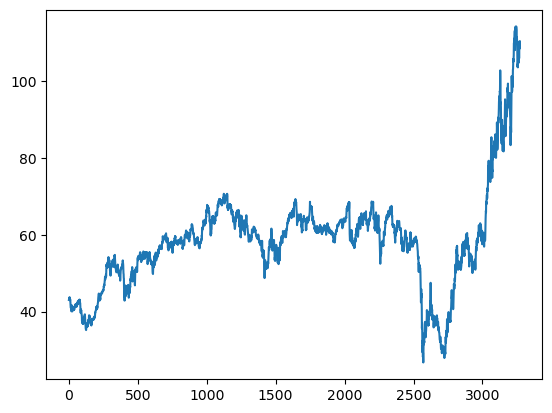

In [14]:
plt.plot(df.Close)

In [15]:
df

,Open,High,Low,Close,Volume
0,42.7679,43.1054,42.4364,43.0324,4.468467e+07
1,43.0588,43.2202,42.8185,43.2036,4.848468e+07
2,43.2202,43.9369,43.1560,43.5761,5.631080e+07
3,43.5012,43.6033,43.2036,43.4389,4.365848e+07
4,43.3718,43.4069,43.0772,43.2639,3.999167e+07
...,...,...,...,...,...
3267,106.9500,108.7400,106.9000,108.6800,1.153945e+07
3268,109.2700,110.4650,108.8300,110.1900,1.196206e+07
3269,109.9100,110.0000,107.9020,108.3800,1.070208e+07
3270,107.9900,109.7200,107.9900,109.2000,1.053403e+07


In [16]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3267    100.659596
3268    100.904882
3269    101.119689
3270    101.337783
3271    101.550765
Name: Close, Length: 3272, dtype: float64

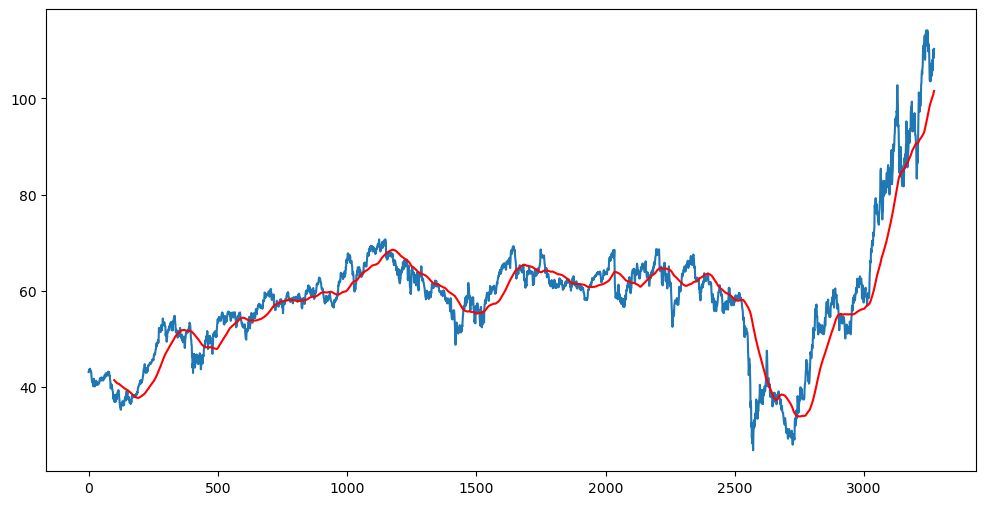

In [17]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [18]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3267    93.609246
3268    93.747270
3269    93.891025
3270    94.061540
3271    94.238965
Name: Close, Length: 3272, dtype: float64

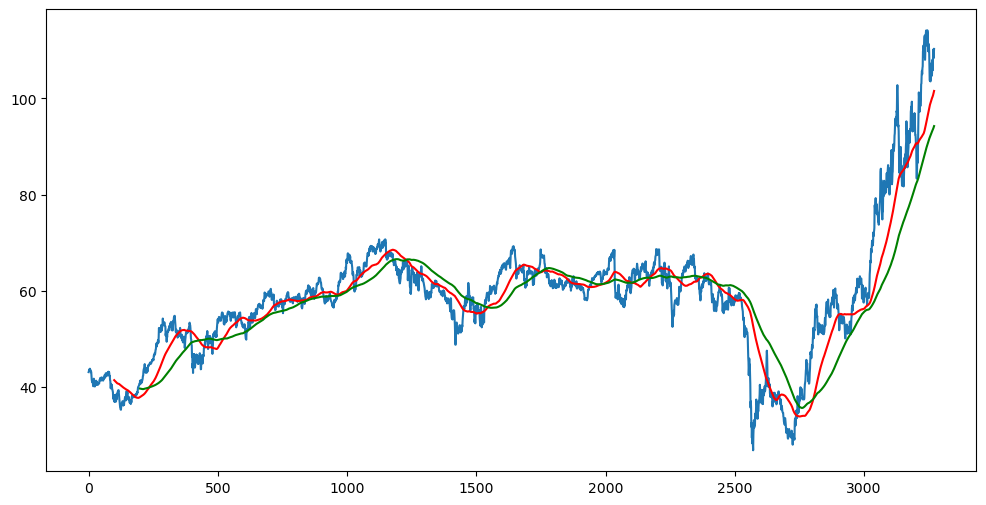

In [19]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [20]:
df.shape

(3272, 5)

In [21]:
#Splitting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2290, 1)
(982, 1)


In [22]:
data_training.head()

,Close
0,43.0324
1,43.2036
2,43.5761
3,43.4389
4,43.2639


In [23]:
data_testing.head()

,Close
2290,59.8976
2291,59.9939
2292,61.0481
2293,61.7338
2294,61.7513


In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [25]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.2207764 ],
       [0.22560563],
       [0.23611315],
       ...,
       [0.71431674],
       [0.7068557 ],
       [0.69376996]])

In [26]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [27]:
#ML Model

In [28]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [32]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, 
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))



model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))




model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))




model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

In [34]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_12 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_13 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_13 (Dropout)        (None, 100, 60)           0         
                                                                 
 lstm_14 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_14 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_15 (LSTM)              (None, 120)              

In [35]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50


2023-09-17 16:13:37.737102: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


69/69 [==============================] - 10s 120ms/step - loss: 0.0772
Epoch 2/50
69/69 [==============================] - 9s 126ms/step - loss: 0.0178
Epoch 3/50
69/69 [==============================] - 9s 125ms/step - loss: 0.0148
Epoch 4/50
69/69 [==============================] - 9s 125ms/step - loss: 0.0133
Epoch 5/50
69/69 [==============================] - 9s 125ms/step - loss: 0.0135
Epoch 6/50
69/69 [==============================] - 9s 125ms/step - loss: 0.0121
Epoch 7/50
69/69 [==============================] - 9s 124ms/step - loss: 0.0112
Epoch 8/50
69/69 [==============================] - 9s 125ms/step - loss: 0.0109
Epoch 9/50
69/69 [==============================] - 9s 128ms/step - loss: 0.0098
Epoch 10/50
69/69 [==============================] - 9s 131ms/step - loss: 0.0094
Epoch 11/50
69/69 [==============================] - 9s 125ms/step - loss: 0.0097
Epoch 12/50
69/69 [==============================] - 9s 126ms/step - loss: 0.0092
Epoch 13/50
69/69 [================

In [38]:
model.save('keras_model.h5')

In [39]:
data_testing.head()

,Close
2290,59.8976
2291,59.9939
2292,61.0481
2293,61.7338
2294,61.7513


In [40]:
data_training.tail(100)

,Close
2190,65.7337
2191,66.1207
2192,66.2968
2193,67.0893
2194,67.2401
...,...
2285,60.7934
2286,59.9123
2287,60.5288
2288,60.2643


In [41]:
past_100_days = data_training.tail(100)

In [44]:
final_df = past_100_days.append(data_testing, ignore_index=True)

/var/folders/0k/k4wms98d5ys9z4rqc_fppl440000gn/T/ipykernel_40798/531349220.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [45]:
final_df.head()

,Close
0,65.7337
1,66.1207
2,66.2968
3,67.0893
4,67.2401


In [46]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.44576299],
       [0.45019037],
       [0.45220499],
       ...,
       [0.93364664],
       [0.94302764],
       [0.95561189]])

In [47]:
input_data.shape

(1082, 1)

In [48]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [49]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(982, 100, 1)
(982,)


In [50]:
# Making Predictions

y_predicted = model.predict(x_test)


31/31 [==============================] - 1s 30ms/step


In [51]:
y_predicted.shape

(982, 1)

In [52]:
y_test

array([0.37899665, 0.38009834, 0.39215863, 0.4000032 , 0.40020341,
       0.41356446, 0.41838194, 0.42113103, 0.41455518, 0.42010598,
       0.42087362, 0.42235399, 0.42984162, 0.42577004, 0.43475978,
       0.43763013, 0.436517  , 0.4280844 , 0.4362493 , 0.42560187,
       0.43273371, 0.43475978, 0.44134592, 0.43883136, 0.43613833,
       0.44477227, 0.44283658, 0.44698596, 0.45133668, 0.43920888,
       0.43402531, 0.44366028, 0.43791843, 0.44160104, 0.44216962,
       0.45080356, 0.44755339, 0.44309284, 0.45376201, 0.45783359,
       0.46255154, 0.45265002, 0.44921108, 0.4528159 , 0.44328161,
       0.44081166, 0.44588426, 0.44800986, 0.445207  , 0.46161687,
       0.46606712, 0.45104724, 0.45531902, 0.43930956, 0.4344692 ,
       0.43734069, 0.42245352, 0.40968164, 0.41132903, 0.40816924,
       0.40436422, 0.40549909, 0.40485272, 0.41102816, 0.40305088,
       0.40401873, 0.40923547, 0.40915882, 0.40493166, 0.40485272,
       0.40813492, 0.40164945, 0.38508285, 0.38796465, 0.37400

In [53]:
y_predicted

array([[0.42427737],
       [0.42987344],
       [0.43489206],
       [0.43918246],
       [0.4428627 ],
       [0.44608775],
       [0.44913808],
       [0.4522004 ],
       [0.45528913],
       [0.45826015],
       [0.4609689 ],
       [0.46329898],
       [0.4651895 ],
       [0.46669084],
       [0.46781808],
       [0.46871245],
       [0.46951154],
       [0.47026432],
       [0.4708639 ],
       [0.47130454],
       [0.47149673],
       [0.47143808],
       [0.4712221 ],
       [0.47105286],
       [0.47105557],
       [0.4712206 ],
       [0.4715741 ],
       [0.47209093],
       [0.4727537 ],
       [0.4735478 ],
       [0.4742802 ],
       [0.47474676],
       [0.47491002],
       [0.47476888],
       [0.47440875],
       [0.4739561 ],
       [0.4736389 ],
       [0.47355515],
       [0.47365445],
       [0.47398105],
       [0.47456887],
       [0.47542658],
       [0.47637752],
       [0.47719213],
       [0.47773767],
       [0.47785127],
       [0.47751653],
       [0.476

In [54]:
scaler.scale_

array([0.01144023])

In [55]:
scale_factor = 1/0.01144023
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

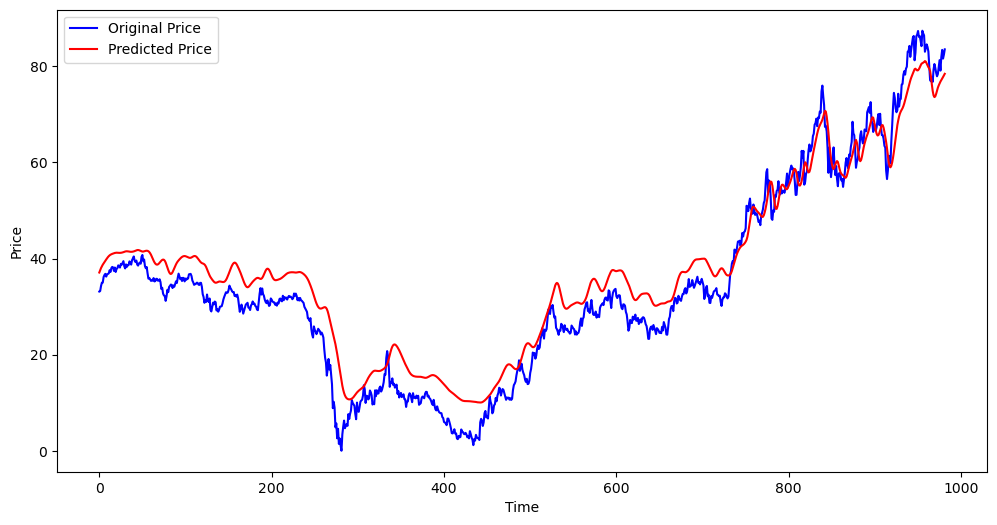

In [57]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()